In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Delhi_v2.csv")
df1.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [3]:
df1.columns

Index(['Unnamed: 0', 'price', 'Address', 'area', 'latitude', 'longitude',
       'Bedrooms', 'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'Landmarks', 'type_of_building', 'desc',
       'Price_sqft'],
      dtype='object')

In [60]:
df2 = df1.drop(['latitude','longitude','Balcony','Status','neworold','parking', 'Furnished_status' ,'Lift','Landmarks','type_of_building','desc'],axis='columns')
df2.shape

(7738, 7)

In [61]:
df2.head(10)

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,4592.592593
5,5,3700000.0,"tower 2, 6th floor, Crossings Republik, Ghazia...",1150.0,2.0,2.0,3217.391304
6,6,3270000.0,"Nirala Aspire, GH03, Sector 16C, Hundal, Great...",890.0,2.0,2.0,3674.157303
7,7,3990000.0,"Suncity Avenue 102, Sector 102, Gurgaon Bang o...",850.0,2.0,2.0,4694.117647
8,8,3500000.0,"Sector 2, Greater Noida, Sector 2, Greater Noi...",960.0,2.0,2.0,3645.833333
9,9,5500000.0,"Gaur City 5th Avenue, Noida Extension, Noida, ...",1400.0,3.0,3.0,3928.571429


In [25]:
# cleaning data

In [62]:
df2.isnull().sum()

Unnamed: 0    0
price         0
Address       0
area          0
Bedrooms      0
Bathrooms     0
Price_sqft    0
dtype: int64

In [64]:
print(df2['Address'].head())

0                    Noida Extension, Noida, Delhi NCR
1                        Sector 79, Gurgaon, Delhi NCR
2                       Vaishali, Ghaziabad, Delhi NCR
3    Link Road, F Block, Sector 50, Noida, Uttar Pr...
4    Jaypee Pavilion Court Sector 128, Noida, Secto...
Name: Address, dtype: object


In [67]:
print(df2['Address'].dtype)

object


In [68]:
df2.isnull().sum()

Unnamed: 0    0
price         0
Address       0
area          0
Bedrooms      0
Bathrooms     0
Price_sqft    0
dtype: int64

In [69]:
def extract_second_last_name(address):
    parts = address.split(', ')
    if len(parts) >= 2:
        return parts[-2]
    else:
        return None

In [71]:
df2['location'] = df2['Address'].apply(extract_second_last_name)

In [72]:
df2['location'].head()

0            Noida
1          Gurgaon
2        Ghaziabad
3    Greater Noida
4            Noida
Name: location, dtype: object

In [73]:
df2.head()

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Price_sqft,location
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,4148.148148,Noida
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,5906.040268,Gurgaon
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,6918.238994,Ghaziabad
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3628.571429,Greater Noida
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,4592.592593,Noida


In [75]:
df2['bhk'] = df2.Bedrooms.astype(int)

In [76]:
df2.head()

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Price_sqft,location,bhk
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,4148.148148,Noida,3
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,5906.040268,Gurgaon,3
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,6918.238994,Ghaziabad,4
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3628.571429,Greater Noida,2
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,4592.592593,Noida,2


In [77]:
df2['total_sqft'] = df2.area

In [78]:
df2.head()

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Price_sqft,location,bhk,total_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,4148.148148,Noida,3,1350.0
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,5906.040268,Gurgaon,3,1490.0
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,6918.238994,Ghaziabad,4,2385.0
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3628.571429,Greater Noida,2,1050.0
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,4592.592593,Noida,2,1350.0


In [79]:
df2['bath'] = df2.Bathrooms
df2.head()

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Price_sqft,location,bhk,total_sqft,bath
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,4148.148148,Noida,3,1350.0,3.0
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,5906.040268,Gurgaon,3,1490.0,3.0
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,6918.238994,Ghaziabad,4,2385.0,5.0
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3628.571429,Greater Noida,2,1050.0,2.0
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,4592.592593,Noida,2,1350.0,2.0


In [80]:
# convert "price" in terms of lakhs

In [82]:
df2['price'] = df2.price/100000
df2.head()

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Price_sqft,location,bhk,total_sqft,bath
0,0,56.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,4148.148148,Noida,3,1350.0,3.0
1,1,88.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,5906.040268,Gurgaon,3,1490.0,3.0
2,2,165.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,6918.238994,Ghaziabad,4,2385.0,5.0
3,3,38.1,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3628.571429,Greater Noida,2,1050.0,2.0
4,4,62.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,4592.592593,Noida,2,1350.0,2.0


In [83]:
#drop unknown columns (store in some other df and then drop)


In [88]:
df3 = df2.drop( ['Unnamed: 0','Address','area',], axis = 'columns')

In [89]:
df3.head()

,price,Bedrooms,Bathrooms,Price_sqft,location,bhk,total_sqft,bath
0,56.0,3.0,3.0,4148.148148,Noida,3,1350.0,3.0
1,88.0,3.0,3.0,5906.040268,Gurgaon,3,1490.0,3.0
2,165.0,4.0,5.0,6918.238994,Ghaziabad,4,2385.0,5.0
3,38.1,2.0,2.0,3628.571429,Greater Noida,2,1050.0,2.0
4,62.0,2.0,2.0,4592.592593,Noida,2,1350.0,2.0


# Outlier


In [90]:
df3[df3.total_sqft/df3.bhk<300].head()

,price,Bedrooms,Bathrooms,Price_sqft,location,bhk,total_sqft,bath
10,73.0,3.0,2.0,8588.235294,New Delhi - Rohini,3,850.0,2.0
42,24.0,2.0,2.0,4444.444444,New Delhi - Dwarka,2,540.0,2.0
47,48.0,6.0,3.0,3896.103896,Ghaziabad,6,1232.0,3.0
114,70.0,2.0,2.0,12522.361360,New Delhi - Rohini,2,559.0,2.0
117,26.3,3.0,2.0,3506.666667,Faridabad,3,750.0,2.0


In [93]:
df3[df3.total_sqft/df3.bhk<300].value_counts

<bound method DataFrame.value_counts of       price  Bedrooms  Bathrooms    Price_sqft            location  bhk  \
10     73.0       3.0        2.0   8588.235294  New Delhi - Rohini    3   
42     24.0       2.0        2.0   4444.444444  New Delhi - Dwarka    2   
47     48.0       6.0        3.0   3896.103896           Ghaziabad    6   
114    70.0       2.0        2.0  12522.361360  New Delhi - Rohini    2   
117    26.3       3.0        2.0   3506.666667           Faridabad    3   
...     ...       ...        ...           ...                 ...  ...   
7285   40.0       3.0        2.0   5714.285714    New Delhi - West    3   
7374   45.5       3.0        3.0   6500.000000             Gurgaon    3   
7410   32.0       3.0        2.0   3832.335329           Ghaziabad    3   
7551   30.0       2.0        2.0   5555.555556           Faridabad    2   
7664   31.0       2.0        2.0   5849.056604             Gurgaon    2   

      total_sqft  bath  
10         850.0   2.0  
42       

In [97]:
df3.shape

(7738, 8)

In [98]:
df4 = df3[~(df3.total_sqft/df3.bhk<300)]

In [100]:
df4.shape

(7451, 8)

In [102]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.Price_sqft)
        st = np.std(subdf.Price_sqft)
        reduced_df = subdf[(subdf.Price_sqft>(m-st)) & (subdf.Price_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(5325, 8)

In [104]:
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Ghaziabad              1393
Gurgaon                1248
Noida                   820
Greater Noida           756
Faridabad               337
New Delhi - West        232
New Delhi - South       230
New Delhi - East        119
New Delhi - Dwarka      104
New Delhi - Rohini       45
New Delhi - North        27
New Delhi - Central       8
Gurgaon - South           3
New Delhi                 3
Name: count, dtype: int64

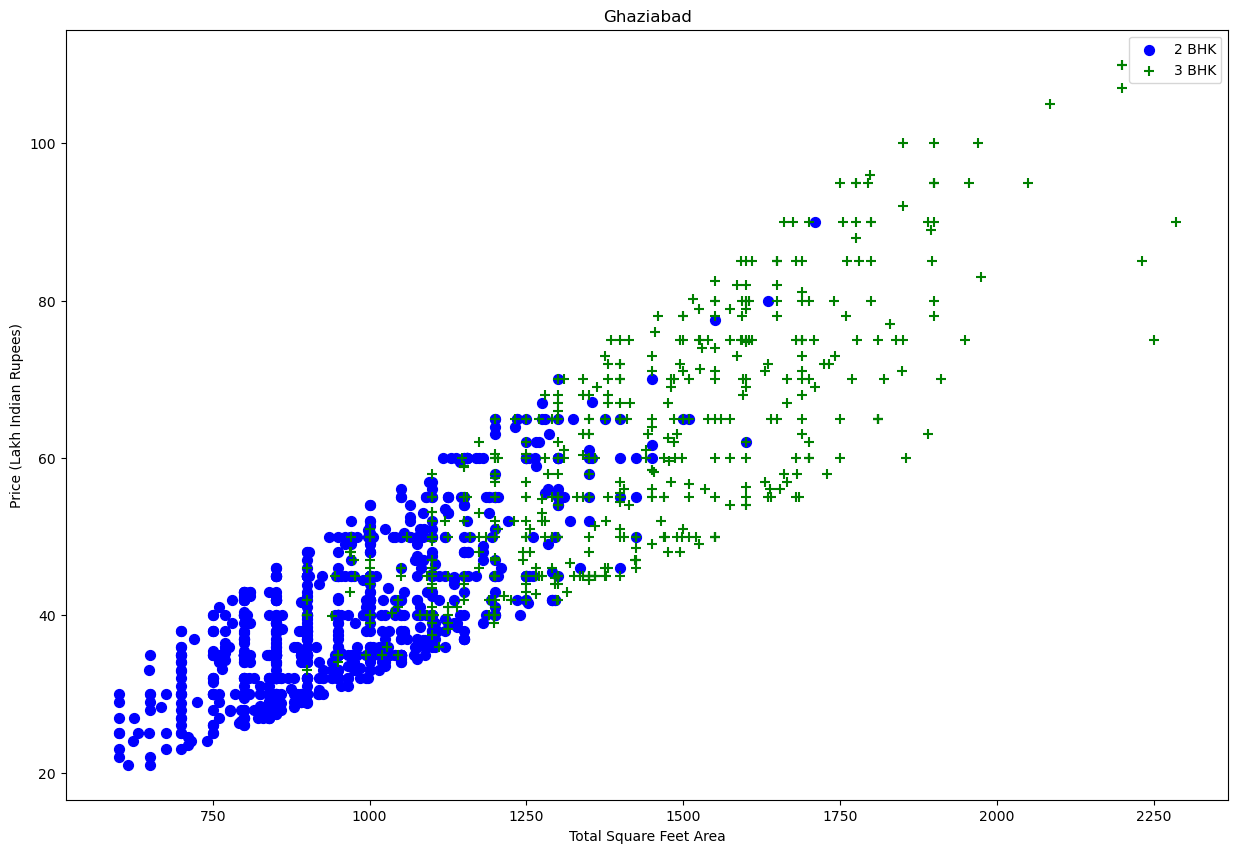

In [105]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Ghaziabad")

In [106]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_sqft),
                'std': np.std(bhk_df.Price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape

(4134, 8)

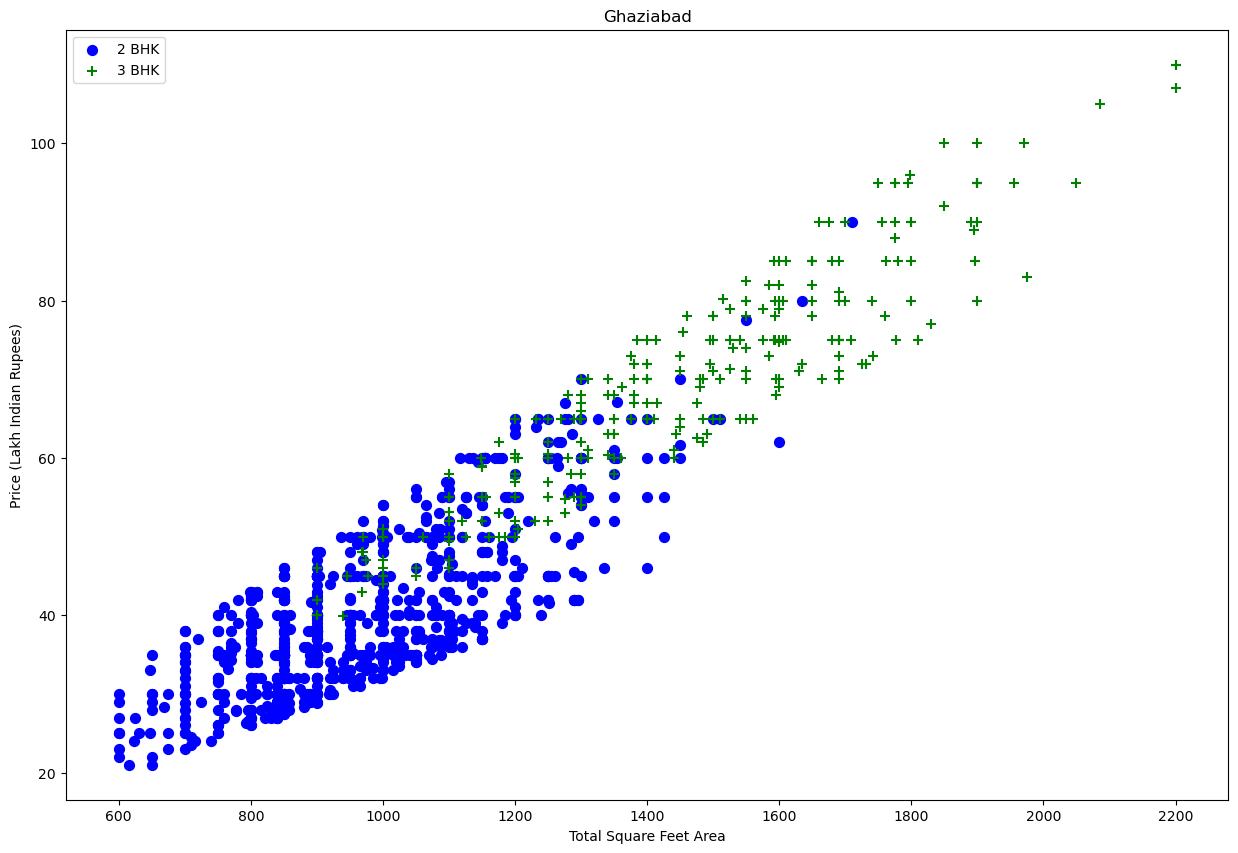

In [107]:
plot_scatter_chart(df6,"Ghaziabad")

Text(0, 0.5, 'Count')

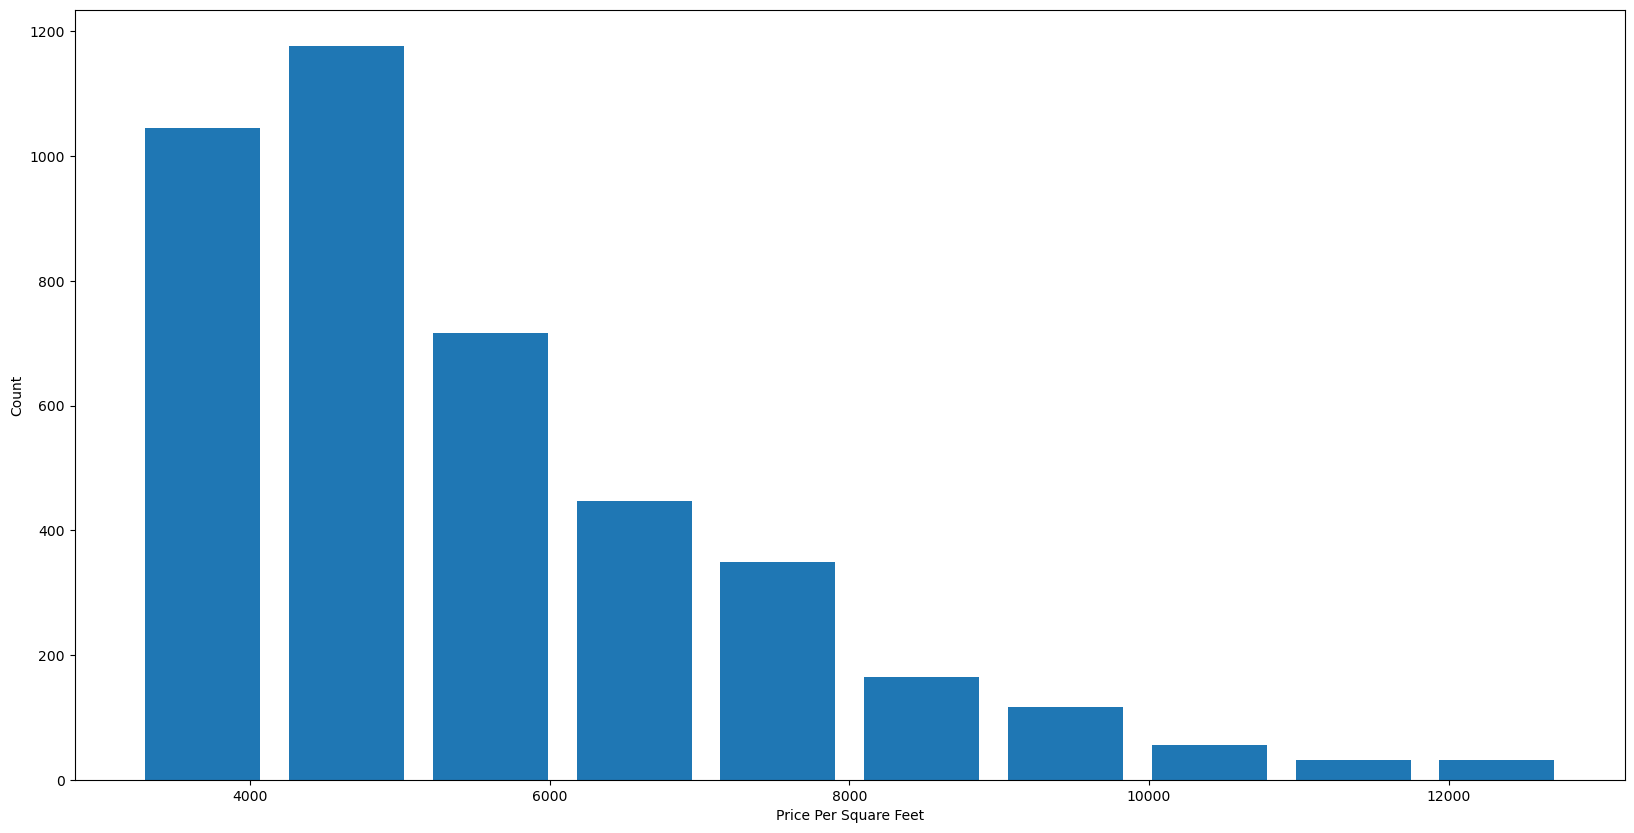

In [108]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.Price_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [109]:
df6[df6.bath>df6.bhk+2] #how could no. of bathrooms be greater than no. of room itself....error....fix it

,price,Bedrooms,Bathrooms,Price_sqft,location,bhk,total_sqft,bath
3612,180.0,3.0,6.0,7500.0,Gurgaon,3,2400.0,6.0


In [110]:
df7 = df6[~(df6.bath>df6.bhk+2)]

In [112]:
df7.head()

,price,Bedrooms,Bathrooms,Price_sqft,location,bhk,total_sqft,bath
0,111.0,4.0,3.0,5285.714286,Faridabad,4,2100.0,3.0
2,55.0,2.0,2.0,5000.000000,Faridabad,2,1100.0,2.0
3,100.0,4.0,3.0,5241.090147,Faridabad,4,1908.0,3.0
4,135.0,4.0,4.0,4821.428571,Faridabad,4,2800.0,4.0
5,58.0,3.0,2.0,4296.296296,Faridabad,3,1350.0,2.0


In [114]:
df7.shape

(4133, 8)

In [116]:
df8 = df7.drop(['Price_sqft','Bathrooms','Bedrooms'], axis = "columns")

In [117]:
df8.head()

,price,location,bhk,total_sqft,bath
0,111.0,Faridabad,4,2100.0,3.0
2,55.0,Faridabad,2,1100.0,2.0
3,100.0,Faridabad,4,1908.0,3.0
4,135.0,Faridabad,4,2800.0,4.0
5,58.0,Faridabad,3,1350.0,2.0


# Dummies for location

In [118]:
dummies = pd.get_dummies(df8.location)
dummies.head(10)

,Faridabad,Ghaziabad,Greater Noida,Gurgaon,Gurgaon - South,New Delhi,New Delhi - Central,New Delhi - Dwarka,New Delhi - East,New Delhi - North,New Delhi - Rohini,New Delhi - South,New Delhi - West,Noida
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,False,False,False,False
9,True,False,False,False,False,False,False,False,False,False,False,False,False,False
10,True,False,False,False,False,False,False,False,False,False,False,False,False,False
11,True,False,False,False,False,False,False,False,False,False,False,False,False,False
15,True,False,False,False,False,False,False,False,False,False,False,False,False,False
16,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [119]:
# in terms of 0 and 1

In [120]:
dummies = pd.get_dummies(df8.location).astype(int)
dummies.head(10)

,Faridabad,Ghaziabad,Greater Noida,Gurgaon,Gurgaon - South,New Delhi,New Delhi - Central,New Delhi - Dwarka,New Delhi - East,New Delhi - North,New Delhi - Rohini,New Delhi - South,New Delhi - West,Noida
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,0,0,0,0
16,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
df9 = df8.copy()

In [122]:
df9 = pd.concat([df8,dummies],axis='columns')
df9.head()

,price,location,bhk,total_sqft,bath,Faridabad,Ghaziabad,Greater Noida,Gurgaon,Gurgaon - South,New Delhi,New Delhi - Central,New Delhi - Dwarka,New Delhi - East,New Delhi - North,New Delhi - Rohini,New Delhi - South,New Delhi - West,Noida
0,111.0,Faridabad,4,2100.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,55.0,Faridabad,2,1100.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100.0,Faridabad,4,1908.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,135.0,Faridabad,4,2800.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,58.0,Faridabad,3,1350.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
df10 = df9.drop('location',axis='columns')
df10.head(10)

,price,bhk,total_sqft,bath,Faridabad,Ghaziabad,Greater Noida,Gurgaon,Gurgaon - South,New Delhi,New Delhi - Central,New Delhi - Dwarka,New Delhi - East,New Delhi - North,New Delhi - Rohini,New Delhi - South,New Delhi - West,Noida
0,111.0,4,2100.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,55.0,2,1100.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100.0,4,1908.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,135.0,4,2800.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,58.0,3,1350.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,66.9,3,1625.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,55.0,3,1200.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11,52.5,2,1100.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
15,67.0,3,1250.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
16,95.0,4,2184.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# MODEL 

In [124]:
df10.shape

(4133, 18)

In [125]:
df12 = df10.copy()

In [127]:
df12.shape

(4133, 18)

In [128]:
x = df12.drop(['price'],axis='columns')
x.head(10)

,bhk,total_sqft,bath,Faridabad,Ghaziabad,Greater Noida,Gurgaon,Gurgaon - South,New Delhi,New Delhi - Central,New Delhi - Dwarka,New Delhi - East,New Delhi - North,New Delhi - Rohini,New Delhi - South,New Delhi - West,Noida
0,4,2100.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1100.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1908.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2800.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3,1350.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,1625.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,3,1200.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11,2,1100.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
15,3,1250.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
16,4,2184.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [129]:
y = df12.price
y.head(10)

0     111.0
2      55.0
3     100.0
4     135.0
5      58.0
9      66.9
10     55.0
11     52.5
15     67.0
16     95.0
Name: price, dtype: float64

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [136]:
from sklearn.linear_model import LinearRegression
lr_clf_delhi = LinearRegression()
lr_clf_delhi.fit(X_train,y_train)
lr_clf_delhi.score(X_test,y_test)

0.902617160664507

In [137]:
# K-fold to check accuracy scores....

In [138]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.89334613, 0.90095529, 0.91462619, 0.91935509, 0.89619897])

# PREDICTION........

In [139]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    d = np.zeros(len(x.columns))
    d[0] = sqft
    d[1] = bath
    d[2] = bhk
    if loc_index >= 0:
        d[loc_index] = 1

    return lr_clf_delhi.predict([d])[0]

In [140]:
predict_price('Noida',1000, 2, 2)

C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3423.05762908526

In [141]:
predict_price('Gurgaon - South',1000, 2, 2)

C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3436.5642576069513

In [143]:
predict_price('Faridabad',2000, 2, 2)

C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6855.244817339403

In [144]:
import pickle
with open('delhi_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf_delhi,f)

In [145]:
import json
columns = {
    'data_columns_delhi' : [col.lower() for col in x.columns]
}
with open("columns_delhi.json","w") as f:
    f.write(json.dumps(columns))